# Importations

In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


## Extracting Data into Pandas DataFrame & Authentication

In [118]:
df = pd.read_csv('Churn_Modelling_Dataset.csv', index_col=None)
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [119]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [120]:
df.shape

(10000, 14)

In [121]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [122]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [123]:
print(f"The number of duplicates within the Dataset is {df.duplicated().sum()}")

The number of duplicates within the Dataset is 0


# Clarify Variables for Testing

In [124]:
x = df [['Balance', 'Tenure', 'CreditScore', 'IsActiveMember']]

y = df['Exited']

# Testing (EDA)

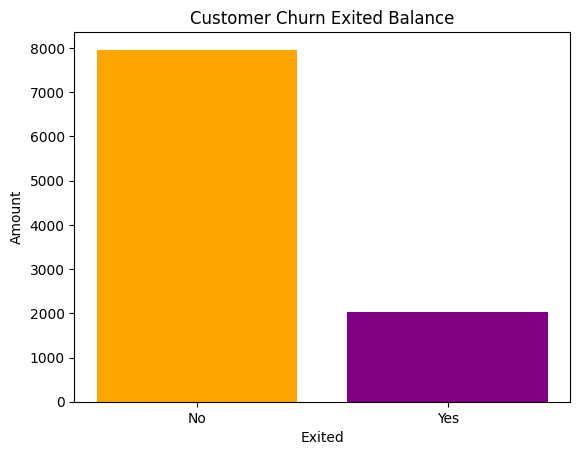

In [125]:
churn_answer = df['Exited'].value_counts()
plt.bar(churn_answer.index, churn_answer.values, color=['orange', 'purple'])

plt.title('Customer Churn Exited Balance')
plt.xlabel('Exited')
plt.ylabel('Amount')

plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

plt.show()

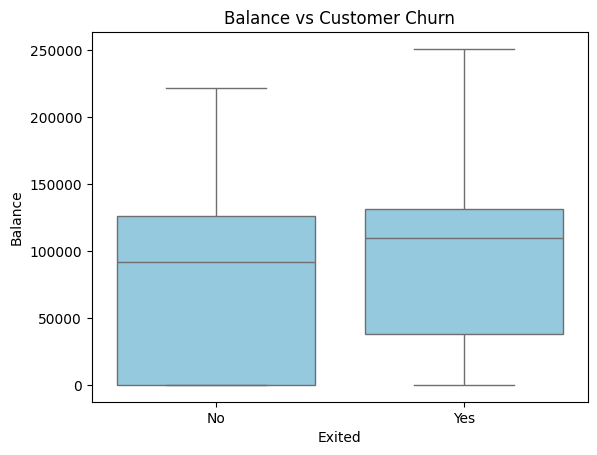

In [126]:
sns.boxplot(x='Exited', y='Balance', data=df, color = 'skyblue')
plt.title('Balance vs Customer Churn')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

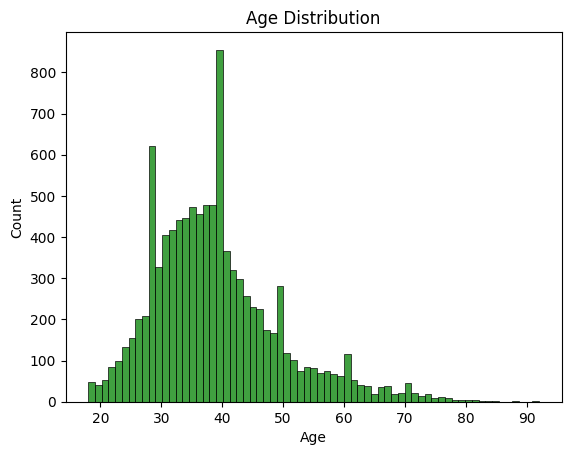

In [127]:
sns.histplot(df['Age'], color ='green')
plt.title('Age Distribution')
plt.show()

# Creating Testing & Training Dataset Splits

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=50)

In [129]:
model=LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [130]:
y_prediction = model.predict(x_test)
mse = mean_squared_error (y_test, y_prediction)
r_squared = r2_score(y_test, y_prediction)

print(f"The Mean Squared Error is", mse)
print(f"The R Squared Score is", r_squared)
print (model.coef_)

The Mean Squared Error is 0.1562525676794401
The R Squared Score is 0.03423201735918502
[ 8.09822381e-07 -2.46831449e-03 -9.80153415e-05 -1.29960302e-01]


# Plotting Regression Line

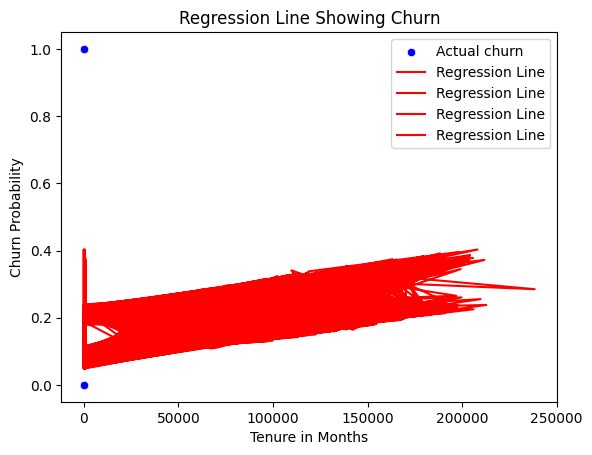

In [131]:
sns.scatterplot(x=x_test['Tenure'], y=y_test, color='blue', label='Actual churn')
plt.plot(x_test, y_prediction, color='red', label='Regression Line')

plt.title('Regression Line Showing Churn')
plt.xlabel('Tenure in Months')
plt.ylabel('Churn Probability')
plt.legend()
plt.show()